## Importing library

In [617]:
import pandas as pd
import numpy as np

import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [618]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

warnings.filterwarnings("ignore")


## Reading file data

In [619]:
df=pd.read_csv('train.csv')

In [620]:
df.shape

(69999, 172)

In [621]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

## Data Cleansing

In [622]:
#Data Cleaning - Fix rows and columns
#Validation 1: Incorrect rows & Summary rows
#Observation: There is no Header, Footer, Total and sub total rows.
df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [623]:
df.shape

(69999, 172)

In [624]:
df.id.nunique()

69999

In [625]:
df.drop("id", axis = 'columns', inplace = True)

### Significant number of Missing values in a row/column and blank rows

In [626]:
df.isnull().all(axis=1).sum()

0

Observation: No Blank rows and deleted columns where there is no data.

### Check for blank columns and delete them

In [627]:
df.isnull().all(axis=0).sum()

0

### Null values Check

In [628]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending = False)

count_rech_2g_6             74.902499
arpu_2g_6                   74.902499
night_pck_user_6            74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
fb_user_6                   74.902499
arpu_3g_7                   74.478207
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
av_rech_amt_data_7          74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_8            73.689624
arpu_3g_8                   73.689624
max_rech_data_8             73.689624
av_rech_amt_data_8          73.689624
date_of_last_rech_data_8    73.689624
fb_user_8   

In [629]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = df.columns
df_null = df.isnull().sum() * 100 / len(df)
df_null = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_null})
cols_to_drop = df_null[(df_null["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",cols_to_drop)

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
total_rech_data_6                  total_rech_data_6
total_rech_data_7                  total_rech_data_7
total_rech_data_8                  total_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
av_rech_amt_data_6                av_rech_amt_data_6
av_rech_amt_data_7                av_rech_amt_data_7
av_rech_amt_data_8                av_rech_amt_data_8
arpu_3g_6            

In [630]:
# lets drop these columns
df.drop(cols_to_drop, axis=1,inplace = True)
df.shape

(69999, 141)

In [631]:
#### Check null columns which are below 30 percent.
cols = df.columns
df_null = df.isnull().sum() * 100 / len(df)
df_null = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_null})
df_null[df_null.perc_null!=0].round(0)

,col_name,perc_null
loc_og_t2o_mou,loc_og_t2o_mou,1.0
std_og_t2o_mou,std_og_t2o_mou,1.0
loc_ic_t2o_mou,loc_ic_t2o_mou,1.0
last_date_of_month_7,last_date_of_month_7,1.0
last_date_of_month_8,last_date_of_month_8,1.0
onnet_mou_6,onnet_mou_6,4.0
onnet_mou_7,onnet_mou_7,4.0
onnet_mou_8,onnet_mou_8,5.0
offnet_mou_6,offnet_mou_6,4.0
offnet_mou_7,offnet_mou_7,4.0


In [632]:
#### null data is below 5% of total data, we decided to delete them.
df.dropna(how = 'any',inplace = True)

In [633]:
df.isnull().sum() * 100 / len(df)

circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6            0.0
loc_og_mou_7        

### Checking column types

In [634]:
df.columns.to_series().groupby(df.dtypes).count()

int64       27
float64    108
object       6
dtype: int64

In [635]:
df.select_dtypes('float')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,352.91,0.00,0.00,3.96,0.00,0.00,0.00,0.00
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,0.0,0.0,0.0,16.16,37.99,4.60,0.00,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.0,0.0

In [636]:
df.select_dtypes('object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014
...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014


In [637]:
#convert object into datetime.
df['last_date_of_month_6']= pd.to_datetime(df['last_date_of_month_6'])
df['last_date_of_month_7']= pd.to_datetime(df['last_date_of_month_7'])
df['last_date_of_month_8']= pd.to_datetime(df['last_date_of_month_8'])
df['date_of_last_rech_6']= pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7']= pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8']= pd.to_datetime(df['date_of_last_rech_8'])

In [638]:
df.columns.to_series().groupby(df.dtypes).count()

int64              27
float64           108
datetime64[ns]      6
dtype: int64

#### Checking columns for single unique value

In [639]:
df.columns[df.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

#### droping columns which have single unique value

In [640]:
df.drop(df.columns[df.nunique()==1], axis = 1, inplace = True)

In [641]:
df.shape

(61895, 128)

In [642]:
df.columns.to_series().groupby(df.dtypes).count()

int64             26
float64           99
datetime64[ns]     3
dtype: int64

In [643]:
#### converting datetime values to int (No. of days)
df.select_dtypes(include=['datetime64'])

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30
...,...,...,...
69994,2014-06-18,2014-07-31,2014-08-31
69995,2014-06-28,2014-07-31,2014-08-27
69996,2014-06-25,2014-07-30,2014-08-29
69997,2014-06-29,2014-07-19,2014-08-26


In [644]:
df.date_of_last_rech_6.describe()

count                   61895
unique                     30
top       2014-06-30 00:00:00
freq                    11294
first     2014-06-01 00:00:00
last      2014-06-30 00:00:00
Name: date_of_last_rech_6, dtype: object

In [645]:
df.date_of_last_rech_7.describe()

count                   61895
unique                     31
top       2014-07-31 00:00:00
freq                    11514
first     2014-07-01 00:00:00
last      2014-07-31 00:00:00
Name: date_of_last_rech_7, dtype: object

In [646]:
df.date_of_last_rech_8.describe()

count                   61895
unique                     31
top       2014-08-31 00:00:00
freq                     9742
first     2014-08-01 00:00:00
last      2014-08-31 00:00:00
Name: date_of_last_rech_8, dtype: object

In [647]:
df.date_of_last_rech_6 = df.date_of_last_rech_6.dt.day
df.date_of_last_rech_7 = df.date_of_last_rech_7.dt.day
df.date_of_last_rech_8 = df.date_of_last_rech_8.dt.day

In [648]:
df.columns.to_series().groupby(df.dtypes).count()

int64      29
float64    99
dtype: int64

In [649]:
#Check for categorical columns in dataset
df.columns[df.nunique()<=15]

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'churn_probability'],
      dtype='object')

In [650]:
y = df.pop('churn_probability')

In [651]:
x = pd.get_dummies(data=df, columns=df.columns[df.nunique()<=15], drop_first = True)
x.shape

(61895, 167)

In [652]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 100, stratify=y)

In [653]:
X_train.shape

(46421, 167)

In [654]:
## model building

In [655]:
from sklearn.decomposition import IncrementalPCA

In [656]:
pca_final = IncrementalPCA(n_components=16)

In [657]:
df_train_pca = pca_final.fit_transform(X_train)

In [658]:
df_train_pca.shape

(46421, 16)

In [659]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [660]:
corrmat.shape

(16, 16)

<AxesSubplot:>

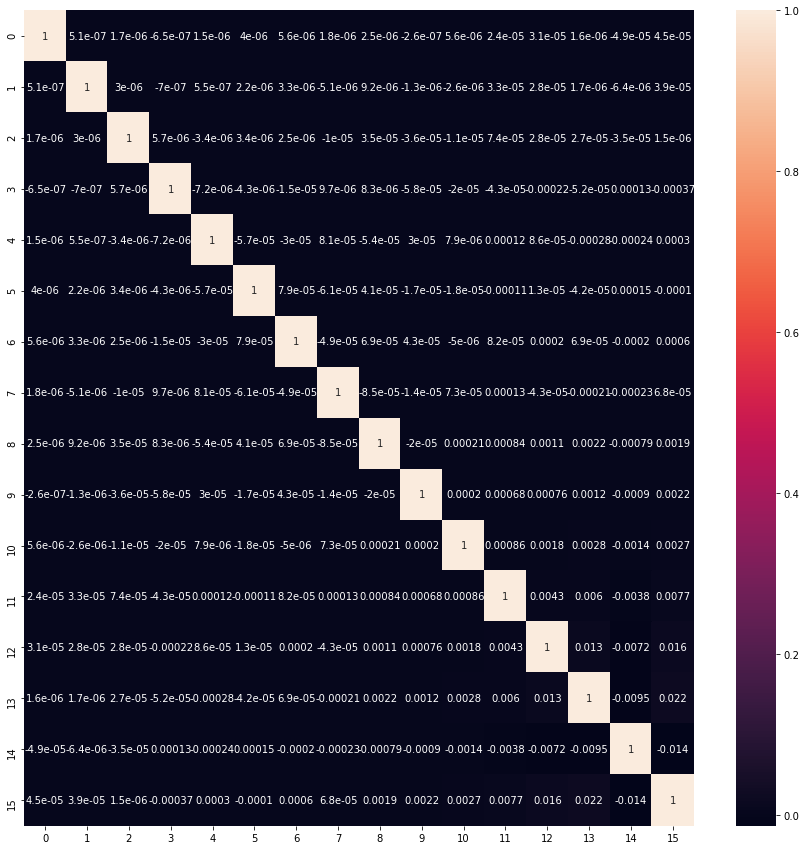

In [661]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [662]:
#Applying the transformation on the test set

In [663]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(15474, 16)

In [664]:
### Applying logistic regression on the data on our Principal components

In [665]:
from sklearn.linear_model import LogisticRegression

In [666]:
learner_pca = LogisticRegression()

In [667]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [668]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [669]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.82'

In [670]:
dfunseen=pd.read_csv('test (1).csv')

In [671]:
dfunseen.shape

(30000, 171)

In [672]:
dfunseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [673]:
dfunseen.drop(cols_to_drop, axis=1,inplace = True)
dfunseen.shape

(30000, 141)

In [674]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64       27
float64    108
object       6
dtype: int64

In [675]:
dfunseen['last_date_of_month_6']= pd.to_datetime(dfunseen['last_date_of_month_6'])
dfunseen['last_date_of_month_7']= pd.to_datetime(dfunseen['last_date_of_month_7'])
dfunseen['last_date_of_month_8']= pd.to_datetime(dfunseen['last_date_of_month_8'])
dfunseen['date_of_last_rech_6']= pd.to_datetime(dfunseen['date_of_last_rech_6'])
dfunseen['date_of_last_rech_7']= pd.to_datetime(dfunseen['date_of_last_rech_7'])
dfunseen['date_of_last_rech_8']= pd.to_datetime(dfunseen['date_of_last_rech_8'])

In [676]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64              27
float64           108
datetime64[ns]      6
dtype: int64

In [677]:
dfunseen.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis = 1, inplace = True)

In [678]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64             26
float64           99
datetime64[ns]     3
dtype: int64

In [679]:
dfunseen.select_dtypes(include=['datetime64'])

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-26,2014-08-24
1,2014-06-19,2014-07-16,2014-08-24
2,2014-06-29,2014-07-27,2014-08-28
3,2014-06-25,2014-07-30,2014-08-24
4,2014-06-29,2014-07-29,2014-08-30
...,...,...,...
29995,2014-06-27,2014-07-27,2014-08-29
29996,2014-06-18,2014-07-24,2014-08-29
29997,2014-06-22,2014-07-10,2014-08-30
29998,2014-06-30,2014-07-18,2014-08-31


In [680]:
dfunseen.date_of_last_rech_6.fillna('2014-06-01')
dfunseen.date_of_last_rech_7.fillna('2014-07-01')
dfunseen.date_of_last_rech_8.fillna('2014-08-01')

dfunseen.date_of_last_rech_6 = dfunseen.date_of_last_rech_6.dt.day
dfunseen.date_of_last_rech_7 = dfunseen.date_of_last_rech_7.dt.day
dfunseen.date_of_last_rech_8 = dfunseen.date_of_last_rech_8.dt.day

In [681]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64       26
float64    102
dtype: int64

In [689]:
dfunseen.date_of_last_rech_6.value_counts()

30.0    5080
29.0    3869
27.0    3369
28.0    2739
26.0    1612
25.0    1494
17.0    1258
24.0    1241
14.0    1159
21.0    1093
18.0     861
23.0     848
12.0     765
22.0     720
13.0     679
19.0     622
20.0     551
16.0     343
15.0     268
11.0     181
8.0      152
7.0       99
5.0       98
10.0      83
9.0       64
1.0       63
3.0       61
6.0       50
4.0       41
2.0       31
Name: date_of_last_rech_6, dtype: int64

In [551]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64       26
float64    102
dtype: int64

In [399]:
xunseen_id = dfunseen.pop('id')

In [332]:
xunseen_id.head()

0    69999
1    70000
2    70001
3    70002
4    70003
Name: id, dtype: int64

In [694]:
dfunseen.columns.to_series().groupby(dfunseen.dtypes).count()

int64       26
float64    102
dtype: int64

In [695]:
xunseen = pd.get_dummies(data=dfunseen, columns=dfunseen.columns[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8']], drop_first = True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [692]:
dfunseen[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']]

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
29995,1,0,0,0,0,0
29996,0,0,0,0,1,0
29997,0,0,0,0,0,0
29998,0,0,0,0,0,0


In [691]:
dfunseen.columns.to_series().groupby(df.dtypes).count()

int64      28
float64    99
dtype: int64